##ANN_model_sequential

used data : MNIST(28*28 Matrix = 784 pixel)


In [1]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
(train_validation_images, train_validation_labels)\
, (test_images, test_labels) = mnist.load_data() #load data&define data

train_validation_images = train_validation_images / 255.#resize data
test_images = test_images / 255.

n_train_validation = train_validation_images.shape[0]
train_ratio = 0.8 #train rate
n_train = int(n_train_validation * train_ratio)

train_x = train_validation_images[:n_train]
train_y = train_validation_labels[:n_train]
validation_x = train_validation_images[n_train:]
validation_y = train_validation_labels[n_train:]
test_x = test_images
test_y = test_labels

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#train set
print('Image :', train_x.shape)
print('Label :', train_y.shape)
#validtation set
print('Image :', validation_x.shape)
print('Label :', validation_y.shape)
#test set
print('Image :', test_x.shape)
print('Label :', test_y.shape)

======Train set======
Image : (48000, 28, 28)
Label : (48000,)
======Validation set======
Image : (12000, 28, 28)
Label : (12000,)
======Test set======
Image : (10000, 28, 28)
Label : (10000,)


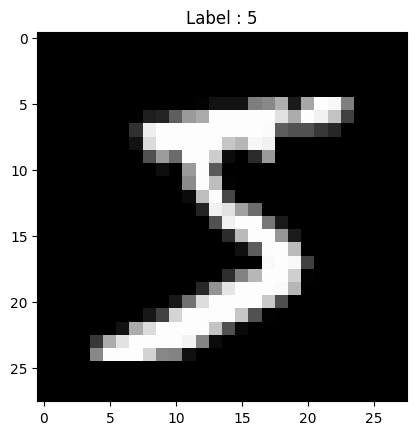

In [4]:
#sample of datasets
plt.imshow(train_x[0], 'gray')
plt.title('Label : {}'.format(train_y[0]))
plt.show()

In [5]:
#build ANN model
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam', metrics = ['accuracy'])

In [6]:
history = model.fit(train_x, train_y, batch_size=16, epochs=10,\
                    verbose=2, validation_data=(validation_x, validation_y))

Epoch 1/10
3000/3000 - 15s - loss: 0.2432 - accuracy: 0.9278 - val_loss: 0.1213 - val_accuracy: 0.9646 - 15s/epoch - 5ms/step
Epoch 2/10
3000/3000 - 8s - loss: 0.1044 - accuracy: 0.9685 - val_loss: 0.1021 - val_accuracy: 0.9682 - 8s/epoch - 3ms/step
Epoch 3/10
3000/3000 - 5s - loss: 0.0733 - accuracy: 0.9774 - val_loss: 0.1073 - val_accuracy: 0.9698 - 5s/epoch - 2ms/step
Epoch 4/10
3000/3000 - 6s - loss: 0.0571 - accuracy: 0.9813 - val_loss: 0.0927 - val_accuracy: 0.9736 - 6s/epoch - 2ms/step
Epoch 5/10
3000/3000 - 5s - loss: 0.0425 - accuracy: 0.9865 - val_loss: 0.1257 - val_accuracy: 0.9678 - 5s/epoch - 2ms/step
Epoch 6/10
3000/3000 - 6s - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.1091 - val_accuracy: 0.9731 - 6s/epoch - 2ms/step
Epoch 7/10
3000/3000 - 6s - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.1089 - val_accuracy: 0.9733 - 6s/epoch - 2ms/step
Epoch 8/10
3000/3000 - 6s - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.1264 - val_accuracy: 0.9707 - 6s/epoch - 2ms/step
Epoch 

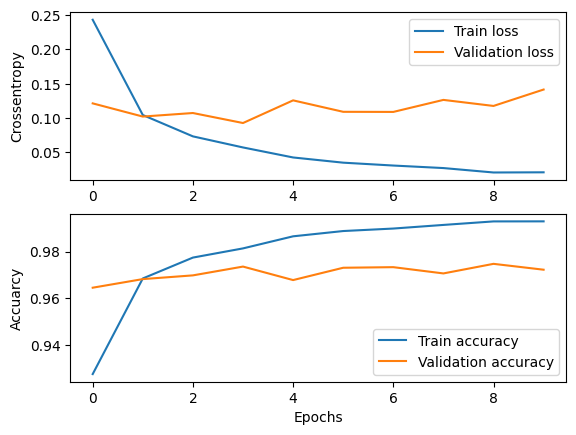

In [7]:
#Plot training loss and accuracy

fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

In [8]:
#test part
result= model.evaluate(test_x, test_y, verbose=2)

print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'\
      .format(result[0], result[1]*100))

313/313 - 0s - loss: 0.1308 - accuracy: 0.9708 - 402ms/epoch - 1ms/step
Test loss : 0.1308	 Test accuracy : 97.08%


313/313 [==============================] - 0s 1ms/step
Probability is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


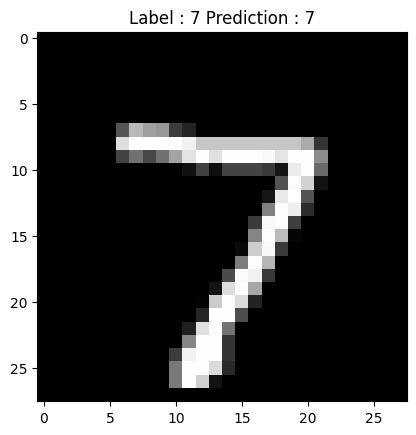

In [9]:
prediction = model.predict(test_x)
plt.imshow(test_x[0], 'gray')
print('Probability is {}'.format(prediction[0].round()))
plt.title('Label : {} Prediction : {}'.format(test_y[0],
                                              np.argmax(prediction[0])))
plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
